In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

## file import

In [2]:
df= pd.read_csv("Unemployment in India.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


####   Basic Information


In [3]:
df.shape

(768, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [5]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [6]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

####  Data Cleaning

In [9]:
round(df.isnull().sum()/len(df),2)*100

Region                                      4.0
 Date                                       4.0
 Frequency                                  4.0
 Estimated Unemployment Rate (%)            4.0
 Estimated Employed                         4.0
 Estimated Labour Participation Rate (%)    4.0
Area                                        4.0
dtype: float64

In [12]:
df.dropna(inplace=True) 
df.shape

(740, 7)

In [13]:
# Renaming the column names with extra spaces before it.
a={}
for i in df.columns:
    if i[0]==" ":
        a.update({i:i.strip()})
df.rename(columns=a,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [14]:
# Converting date column data type.

In [18]:
df["Date"] = pd.to_datetime(df["Date"])

C:\Users\Acer\AppData\Local\Temp\ipykernel_3976\936118274.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"])


In [19]:
df["Month"]=df["Date"].dt.month
df["Year"]=df["Date"].dt.year

In [20]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Month,Year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,2019


In [21]:
df.nunique().tolist()

[28, 14, 2, 624, 740, 626, 2, 12, 2]

In [22]:
## Checking description and count of unique values in columns
for i in df.columns:
    print(df[i].value_counts())

Region
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64
Date
2019-10-31    55
2019-11-30    55
2019-05-31    54
2019-06-30    54
2019-07-31    54
2019-08-31    53
2019-12-31    53
2020-01-31    53
2020-02-29    53
2019-09-30    52
2020-03-31    52
2020-04-30    51
2020-05-31    51
2020-06-30    50
Name: count, dtype: int64
Frequency
Monthly     381
 Monthly    359
Name: count,

In [23]:
# The "Frequency" column can be droped as it has only one value i.e "Monthly".
df= df.drop("Frequency",axis=1)

In [24]:
#### Converting Estimated Employed to Estimated Employed (Laks)

In [25]:
df['Estimated Employed (Lac)']=round( df['Estimated Employed']/100000,2)

In [26]:
df.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Month,Year,Estimated Employed (Lac)
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural,5,2019,119.99
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural,6,2019,117.56
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural,7,2019,120.87
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural,8,2019,122.86
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural,9,2019,122.57


In [27]:
df= df.drop("Estimated Employed",axis=1)

In [28]:
df.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Labour Participation Rate (%),Area,Month,Year,Estimated Employed (Lac)
0,Andhra Pradesh,2019-05-31,3.65,43.24,Rural,5,2019,119.99
1,Andhra Pradesh,2019-06-30,3.05,42.05,Rural,6,2019,117.56
2,Andhra Pradesh,2019-07-31,3.75,43.50,Rural,7,2019,120.87
3,Andhra Pradesh,2019-08-31,3.32,43.97,Rural,8,2019,122.86
4,Andhra Pradesh,2019-09-30,5.17,44.68,Rural,9,2019,122.57


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Estimated Unemployment Rate (%)          740 non-null    float64       
 3   Estimated Labour Participation Rate (%)  740 non-null    float64       
 4   Area                                     740 non-null    object        
 5   Month                                    740 non-null    int32         
 6   Year                                     740 non-null    int32         
 7   Estimated Employed (Lac)                 740 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int32(2), object(2)
memory usage: 46.2+ KB


###  EDA : Exploratory Data Analysis

In [48]:
# categorical Columns
cat_col= [i for i in df if df[i].dtype=='O']
print(f"No. of categorical Columns:{len(cat_col)}")

No. of categorical Columns:2


In [51]:
# numerical Columns:
num_col= [i for i in df if df[i].dtype!='O']
print(f"No. of numerical Columns::{len(num_col)}")

No. of numerical Columns::6


In [52]:
## Starting EDA with Categorical columns.

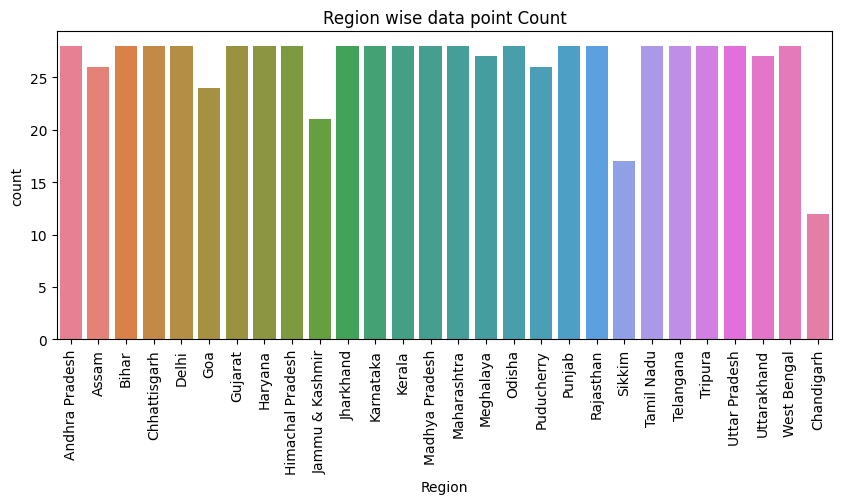

In [110]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize = (10,4))
sns.countplot(df, x='Region',palette="husl")
plt.xticks(rotation=90)
plt.title("Region wise data point Count")
plt.show()

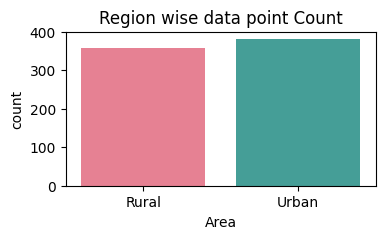

In [111]:
plt.figure(figsize=(4,2))
sns.countplot(df, x="Area",palette='husl')

plt.title("Region wise data point Count")
plt.show()

In [112]:
NUM_COLS_FILT=['Estimated Unemployment Rate (%)','Estimated Labour Participation Rate (%)','Estimated Employed (Lac)']

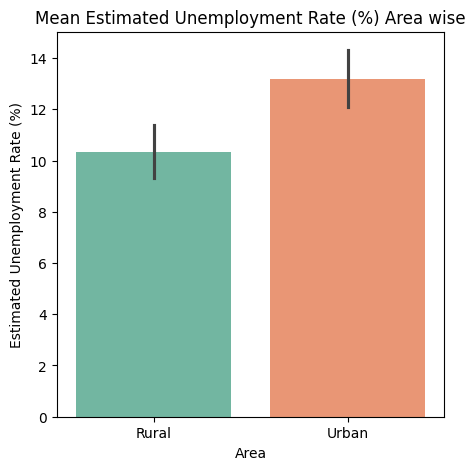

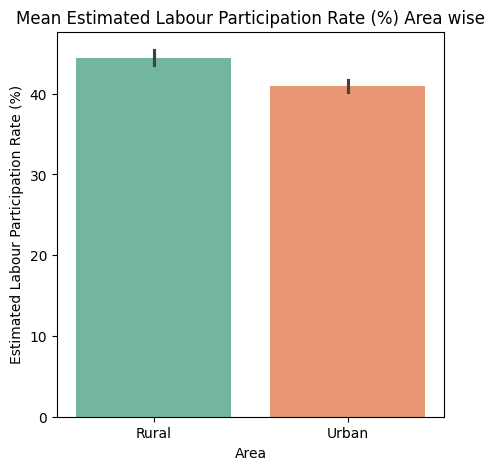

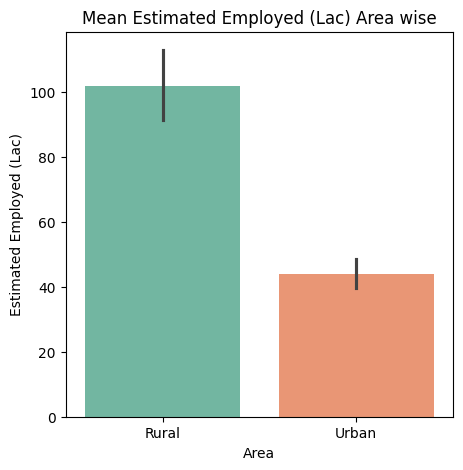

In [113]:
for num1 in NUM_COLS_FILT:
    plt.figure(figsize = (5,5))
    ax=sns.barplot(data=df,y=num1,x="Area",estimator="mean",palette="Set2")
    plt.title(f"Mean {num1} Area wise")
    plt.show()

In [114]:
## Starting EDA with Numerical columns.

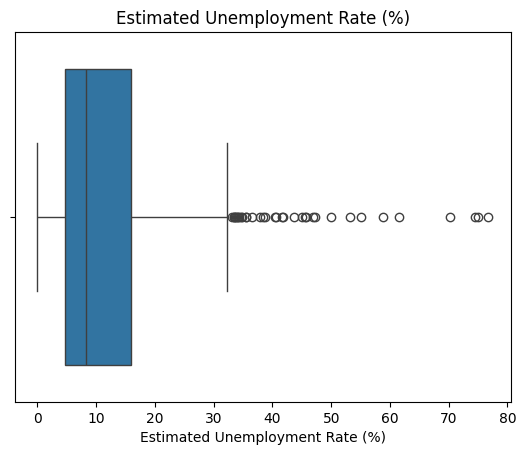

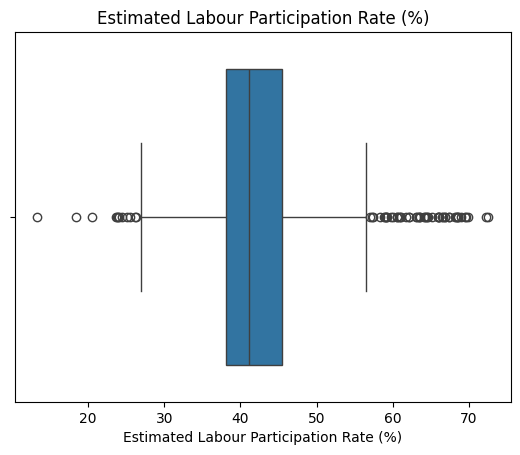

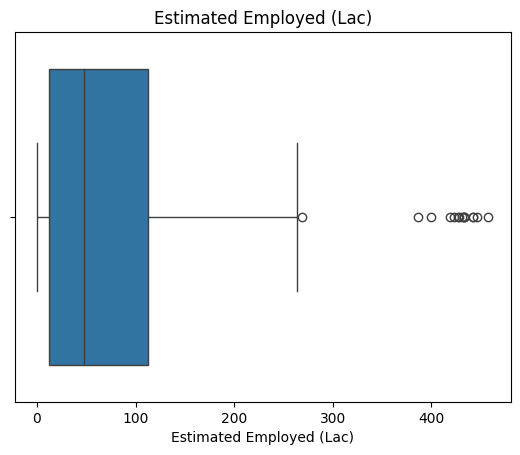

In [115]:
for i in NUM_COLS_FILT:
    sns.boxplot(data =df, x=i)
    plt.title(i)
    plt.show()


<Figure size 1000x1000 with 0 Axes>

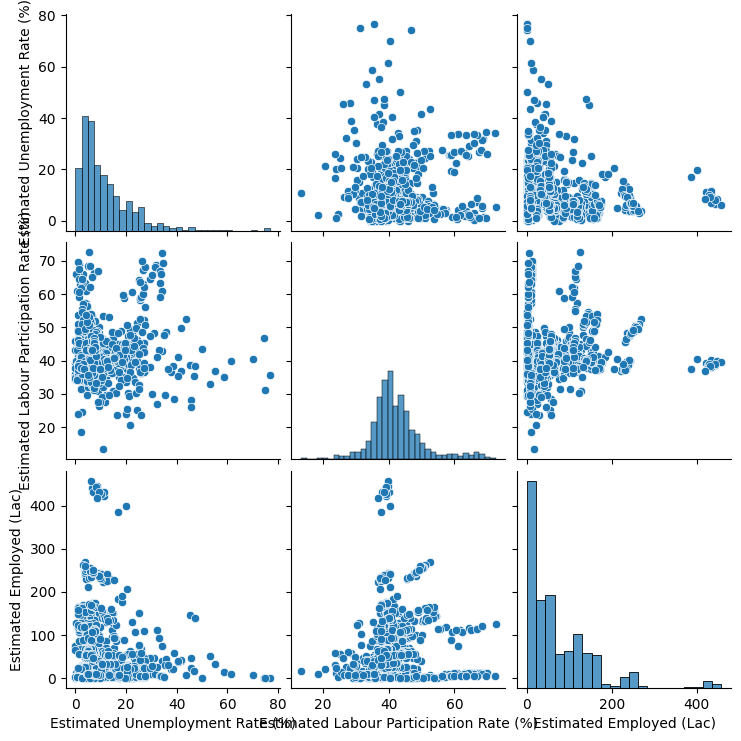

In [116]:
plt.figure(figsize=(10,10))
sns.pairplot(data=df, vars = NUM_COLS_FILT)
plt.xticks(rotation=45)
plt.yticks(rotation=90)
plt.show()

<Axes: >

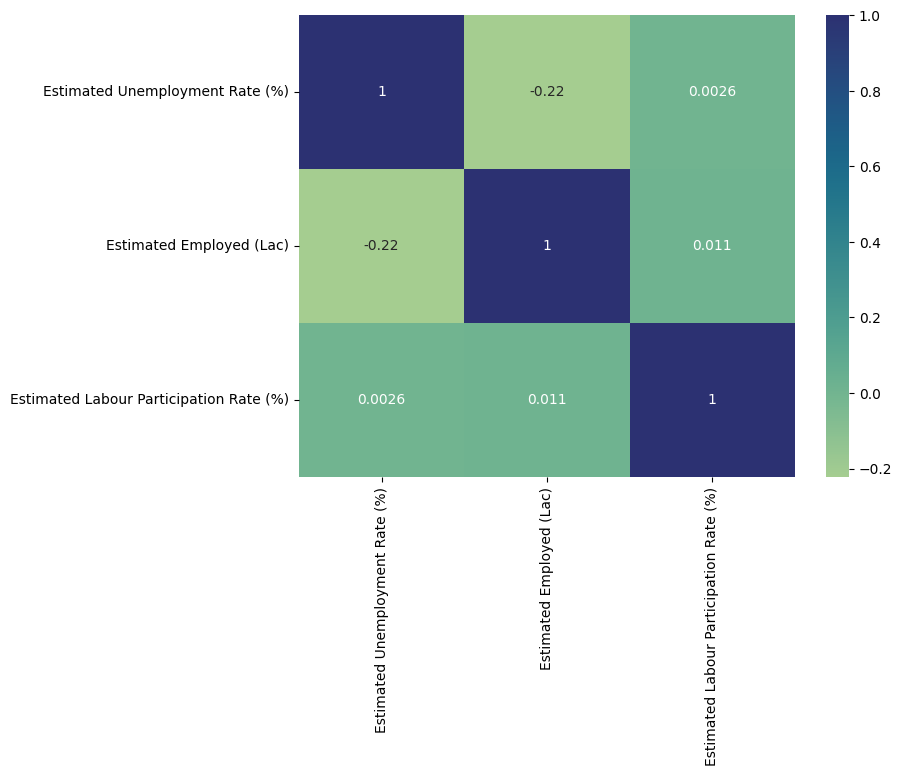

In [117]:
correlation = df[['Estimated Unemployment Rate (%)', "Estimated Employed (Lac)", 'Estimated Labour Participation Rate (%)']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation,annot=True,cmap="crest")